<a href="https://colab.research.google.com/github/jigjid/github_task/blob/main/Wheat_and_the_chessboard_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Example code

In [1]:
n_squares = 4
small_board_list = [1]
for _ in range(n_squares - 1):
    small_board_list.append(2*small_board_list[-1])
print("4マスの板に小麦を並べる（リスト）：{}".format(small_board_list))


4マスの板に小麦を並べる（リスト）：[1, 2, 4, 8]


In [2]:
import numpy as np

small_board_ndarray = np.array(small_board_list)
print("4マスの板に小麦を並べる（ndarray）：{}".format(small_board_ndarray))

4マスの板に小麦を並べる（ndarray）：[1 2 4 8]


# Question 1] Number of wheat on a 2x2 square chessboard


In [5]:
square_board=small_board_ndarray.reshape((2,2))
print(" 2x2 squares board:{}".format(square_board))

 2x2 squares board:[[1 2]
 [4 8]]


## [Problem 2] Extension to n × m squares

In [12]:
def NxM_square(x=8,y=8):
  board_list=[1]
  for _ in range(x*y - 1):
    board_list.append(2*board_list[-1])
  board_list_ndarray=np.array(board_list)
  square = board_list_ndarray.reshape((x,y))
  return square
matrix_8x8 = NxM_square()
print(matrix_8x8)

  


[[1.00000000e+00 2.00000000e+00 4.00000000e+00 8.00000000e+00
  1.60000000e+01 3.20000000e+01 6.40000000e+01 1.28000000e+02]
 [2.56000000e+02 5.12000000e+02 1.02400000e+03 2.04800000e+03
  4.09600000e+03 8.19200000e+03 1.63840000e+04 3.27680000e+04]
 [6.55360000e+04 1.31072000e+05 2.62144000e+05 5.24288000e+05
  1.04857600e+06 2.09715200e+06 4.19430400e+06 8.38860800e+06]
 [1.67772160e+07 3.35544320e+07 6.71088640e+07 1.34217728e+08
  2.68435456e+08 5.36870912e+08 1.07374182e+09 2.14748365e+09]
 [4.29496730e+09 8.58993459e+09 1.71798692e+10 3.43597384e+10
  6.87194767e+10 1.37438953e+11 2.74877907e+11 5.49755814e+11]
 [1.09951163e+12 2.19902326e+12 4.39804651e+12 8.79609302e+12
  1.75921860e+13 3.51843721e+13 7.03687442e+13 1.40737488e+14]
 [2.81474977e+14 5.62949953e+14 1.12589991e+15 2.25179981e+15
  4.50359963e+15 9.00719925e+15 1.80143985e+16 3.60287970e+16]
 [7.20575940e+16 1.44115188e+17 2.88230376e+17 5.76460752e+17
  1.15292150e+18 2.30584301e+18 4.61168602e+18 9.22337204e+18]]

## [Question 3] Total number of wheat

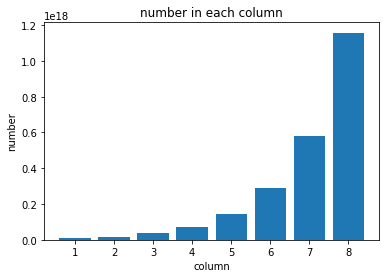

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
matrix_8x8 = NxM_square()
df = pd.DataFrame(matrix_8x8)

plt.xlabel("column")
plt.ylabel("number")
plt.title("number in each column")
col_8 = [df.loc[:, 0].mean(), df.loc[:, 1].mean(),df.loc[:, 2].mean(),df.loc[:, 3].mean(),df.loc[:, 4].mean(),df.loc[:, 5].mean(),df.loc[:, 6].mean(),df.loc[:, 7].mean()]
plt.bar(np.arange(1,9), col_8)
plt.show()

## [Question 4] Heat map of the number of wheat

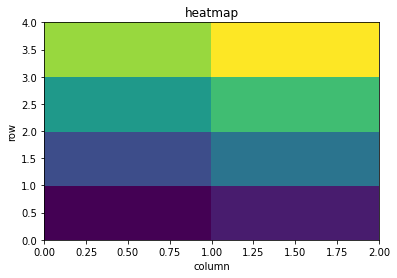

In [25]:
plt.xlabel("column")
plt.ylabel("row")
plt.title("heatmap")
plt.pcolor(np.array([0, 1, 3, 5, 7, 9, 11, 13]).reshape(4, 2))
plt.show()

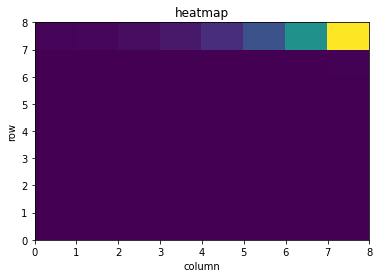

In [28]:
plt.xlabel("column")
plt.ylabel("row")
plt.title("heatmap")
plt.pcolor(np.array([matrix_8x8]).reshape(8, 8))
plt.show()

## [Question 5] How many times the second half is the first half?

In [32]:
first_half = NxM_square(4, 8)
second_half = first_half * pow(2,32)
print(second_half)

[[          4294967296           8589934592          17179869184
           34359738368          68719476736         137438953472
          274877906944         549755813888]
 [       1099511627776        2199023255552        4398046511104
         8796093022208       17592186044416       35184372088832
        70368744177664      140737488355328]
 [     281474976710656      562949953421312     1125899906842624
      2251799813685248     4503599627370496     9007199254740992
     18014398509481984    36028797018963968]
 [   72057594037927936   144115188075855872   288230376151711744
    576460752303423488  1152921504606846976  2305843009213693952
   4611686018427387904 -9223372036854775808]]


## 6. Other calculation methods

<<Sample code (np.append())>>

In [33]:
n_squares = 4
small_board_ndarray = np.array([1])
for _ in range(n_squares - 1):
    small_board_ndarray = np.append(small_board_ndarray, 2*small_board_ndarray[-1])
print("4マスの板に小麦を並べる（ndarray）：{}".format(small_board_ndarray))

4マスの板に小麦を並べる（ndarray）：[1 2 4 8]


《Sample Code (Broadcast)》

In [34]:
n_squares = 4
indices_of_squares = np.arange(n_squares)
small_board_ndarray = 2**indices_of_squares
print("4マスの板に小麦を並べる（ndarray）：{}".format(small_board_ndarray))

4マスの板に小麦を並べる（ndarray）：[1 2 4 8]


Broadcast of numpy

In [35]:
import numpy as np
a = np.array([0,1,2])

#ブロードキャストを使わない場合
b = np.array([5,5,5])
print(a + b)  


print(a + 5)
     

[5 6 7]
[5 6 7]


ndarray type

In [36]:
n_squares = 64
board_ndarray = np.array([1])
for _ in range(n_squares - 1):
    board_ndarray = np.append(board_ndarray, 2*board_ndarray[-1])
print("最後のマスの小麦の数：{}".format(board_ndarray[-1])) 

最後のマスの小麦の数：-9223372036854775808


<ipython-input-36-5cffe3668b3a>:4: RuntimeWarning: overflow encountered in long_scalars
  board_ndarray = np.append(board_ndarray, 2*board_ndarray[-1])


In [37]:
n_squares = 64
indices_of_squares = np.arange(n_squares)
board_ndarray = 2**indices_of_squares
print("最後のマスの小麦の数：{}".format(board_ndarray[-1])) 

最後のマスの小麦の数：-9223372036854775808


In [38]:
print(board_ndarray.dtype)

int64


In [39]:
n_squares = 64
indices_of_squares = np.arange(n_squares).astype(np.uint64)
board_ndarray = 2**indices_of_squares
print("最後のマスの小麦の数：{}".format(board_ndarray[-1]))

最後のマスの小麦の数：9223372036854775808


### [Problem 6] Extension to n × m squares by other calculation methods

In [47]:
def NxM_square(x=8,y=8):
  board_list=[1]
  for _ in range(x*y - 1):
    board_list.append(2*board_list[-1])
  board_list_ndarray=np.array(board_list)
  square = board_list_ndarray.reshape((x,y))
  return square
matrix_8x8 = NxM_square()
print(matrix_8x8)
print("============================")

n_squares = 8
board_array = np.array([1]).astype(np.uint64)
for _ in range(n_squares * n_squares - 1):
  board_array = np.append(board_array, 2*board_array[-1])
print(board_array)

[[1.00000000e+00 2.00000000e+00 4.00000000e+00 8.00000000e+00
  1.60000000e+01 3.20000000e+01 6.40000000e+01 1.28000000e+02]
 [2.56000000e+02 5.12000000e+02 1.02400000e+03 2.04800000e+03
  4.09600000e+03 8.19200000e+03 1.63840000e+04 3.27680000e+04]
 [6.55360000e+04 1.31072000e+05 2.62144000e+05 5.24288000e+05
  1.04857600e+06 2.09715200e+06 4.19430400e+06 8.38860800e+06]
 [1.67772160e+07 3.35544320e+07 6.71088640e+07 1.34217728e+08
  2.68435456e+08 5.36870912e+08 1.07374182e+09 2.14748365e+09]
 [4.29496730e+09 8.58993459e+09 1.71798692e+10 3.43597384e+10
  6.87194767e+10 1.37438953e+11 2.74877907e+11 5.49755814e+11]
 [1.09951163e+12 2.19902326e+12 4.39804651e+12 8.79609302e+12
  1.75921860e+13 3.51843721e+13 7.03687442e+13 1.40737488e+14]
 [2.81474977e+14 5.62949953e+14 1.12589991e+15 2.25179981e+15
  4.50359963e+15 9.00719925e+15 1.80143985e+16 3.60287970e+16]
 [7.20575940e+16 1.44115188e+17 2.88230376e+17 5.76460752e+17
  1.15292150e+18 2.30584301e+18 4.61168602e+18 9.22337204e+18]]

# Question 7] Comparison of calculation time

In [48]:
%%timeit
a = np.array([1, 2, 3])
b = np.array([1, 2, 3])
c = a + b

  


3.56 µs ± 1.75 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [50]:
%%timeit
NxM_square()

19.6 µs ± 3.35 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [51]:
%%timeit
n_squares = 8
board_array = np.array([1]).astype(np.uint64)
for _ in range(n_squares * n_squares - 1):
  board_array = np.append(board_array, 2*board_array[-1])

463 µs ± 138 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
